In [37]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ot_genetics_links = pd.read_csv('../data/traits_and_variants_by_gpcr_gene.csv',index_col=0)
ot_genetics_links

,pval,pvalExponent,pvalMantissa,direction,beta,betaCIUpper,betaCILower,oddsRatio,oddsRatioCIUpper,oddsRatioCILower,...,indexVariant.gnomadASJ,indexVariant.gnomadEAS,indexVariant.gnomadFIN,indexVariant.gnomadNFEEST,indexVariant.gnomadNFENWE,indexVariant.gnomadNFESEU,indexVariant.gnomadNFEONF,indexVariant.gnomadOTH,symbol,ensembl
1,1.887000e-08,-8,1.887000,-,-0.021207,-0.013814,-0.028601,NaN,NaN,NaN,...,0.420690,0.351684,0.299482,0.306466,0.350093,0.396226,0.342254,0.319188,ADORA3,ENSG00000282608
2,7.291000e-09,-9,7.291000,-,-0.021857,-0.014450,-0.029263,NaN,NaN,NaN,...,0.420690,0.351684,0.299482,0.306466,0.350093,0.396226,0.342254,0.319188,ADORA3,ENSG00000282608
3,1.958400e-08,-8,1.958400,+,0.019868,0.026802,0.012934,NaN,NaN,NaN,...,0.568966,0.639175,0.689446,0.706844,0.651692,0.650943,0.652154,0.672192,ADORA3,ENSG00000282608
4,2.512130e-10,-10,2.512130,-,-0.115180,-0.079496,-0.150864,NaN,NaN,NaN,...,0.568966,0.624031,0.687140,0.706783,0.646791,0.641509,0.646341,0.662639,ADORA3,ENSG00000282608
5,3.302000e-08,-8,3.302000,+,0.020729,0.028083,0.013375,NaN,NaN,NaN,...,0.568966,0.639175,0.689446,0.706844,0.651692,0.650943,0.652154,0.672192,ADORA3,ENSG00000282608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25023,1.051000e-33,-33,1.051000,+,0.043944,0.051061,0.036826,NaN,NaN,NaN,...,0.416667,0.599614,0.314591,0.283872,0.416297,0.433962,0.411351,0.357274,XCR1,ENSG00000173578
25024,4.359510e-50,-50,4.359510,+,0.096386,0.109079,0.083693,NaN,NaN,NaN,...,0.416667,0.599614,0.314591,0.283872,0.416297,0.433962,0.411351,0.357274,XCR1,ENSG00000173578
25025,5.555000e-10,-10,5.555000,-,-0.030444,-0.020824,-0.040065,NaN,NaN,NaN,...,0.231818,0.302963,0.337423,0.279615,0.234370,0.307692,0.249306,0.294521,XCR1,ENSG00000173578
25026,4.211568e-08,-8,4.211568,+,NaN,NaN,NaN,1.096614,1.133378,1.061042,...,0.120690,0.000000,0.138377,0.119006,0.105282,0.037736,0.090271,0.093750,XCR1,ENSG00000173578


In [3]:
ot_genetics_links.columns

Index(['pval', 'pvalExponent', 'pvalMantissa', 'direction', 'beta',
       'betaCIUpper', 'betaCILower', 'oddsRatio', 'oddsRatioCIUpper',
       'oddsRatioCILower', 'study.studyId', 'study.traitReported',
       'study.traitEfos', 'study.traitCategory', 'study.numAssocLoci',
       'study.nInitial', 'study.nCases', 'study.nReplication', 'study.nTotal',
       'study.ancestryInitial', 'study.ancestryReplication', 'study.pmid',
       'study.pubDate', 'study.pubTitle', 'study.pubAuthor',
       'study.pubJournal', 'indexVariant.id', 'indexVariant.rsId',
       'indexVariant.mostSevereConsequence', 'indexVariant.gnomadAFR',
       'indexVariant.gnomadAMR', 'indexVariant.gnomadASJ',
       'indexVariant.gnomadEAS', 'indexVariant.gnomadFIN',
       'indexVariant.gnomadNFEEST', 'indexVariant.gnomadNFENWE',
       'indexVariant.gnomadNFESEU', 'indexVariant.gnomadNFEONF',
       'indexVariant.gnomadOTH', 'symbol', 'ensembl'],
      dtype='object')

In [4]:
symbols = pd.Series(ot_genetics_links.symbol.unique())
symbols[~symbols.str.startswith('OR')]

0       ADORA3
1       ADGRB2
2         HTR4
3       ADGRV1
4       BDKRB2
        ...   
364    TAS2R41
365     TAS2R1
366     TAS1R2
367    TAS2R39
368       XCR1
Length: 140, dtype: object

In [5]:
nonOF_links = ot_genetics_links[~ot_genetics_links.symbol.str.startswith('OR')]

In [46]:
sum(nonOF_links['indexVariant.rsId'].isna())

106

In [14]:
len(nonOF_links['study.traitCategory'].unique())

84

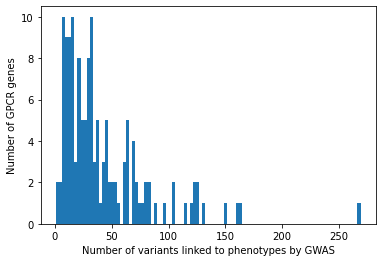

In [72]:
nlinks_by_gene = nonOF_links.groupby(['symbol'])['indexVariant.id'].nunique().sort_values(ascending=False)
plt.hist(nlinks_by_gene,bins=100)
plt.ylabel('Number of GPCR genes')
plt.xlabel('Number of variants linked to phenotypes by GWAS')
plt.savefig('../plots/GPCRs_by_GWAS_variants.png')

In [74]:
missense_nonOF_links = nonOF_links[nonOF_links['indexVariant.mostSevereConsequence'] == 'missense_variant']

In [47]:
len(missense_nonOF_links['indexVariant.id'].unique())

178

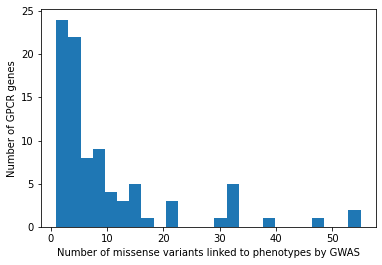

In [76]:
missense_nlinks_by_gene = missense_nonOF_links.groupby(['symbol'])['indexVariant.id'].count().sort_values(ascending=False)
plt.hist(missense_nlinks_by_gene,bins=25)
#plt.xlim((0,16))
#plt.xlabel('GPCR, ranked by number of GWAS links')
plt.xlabel('Number of missense variants linked to phenotypes by GWAS')
plt.ylabel('Number of GPCR genes')
plt.savefig('../plots/GPCRs_by_GWAS_missense_variants.png')